# Examples of my machine learning implmentations

In [1]:
from setup_notebook import set_path_to_root

set_path_to_root()

In [19]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

from learners.linear_regression import LinearRegression

### Regression

Load example data from sklearn

In [10]:
def load_univariate_regression_data() -> Tuple[np.ndarray, np.ndarray]:
    reg_params = {
        "n_features": 1,
        "n_samples": 1000,
        "random_state": 42,
        "noise": 10
    }
    X, y = datasets.make_regression(**reg_params)
    return X, y

def load_multivariate_regression_data() -> Tuple[np.ndarray, np.ndarray]:
    return datasets.load_diabetes(return_X_y=True)

X_reg_uni, y_reg_uni = load_univariate_regression_data()

#### Univariate

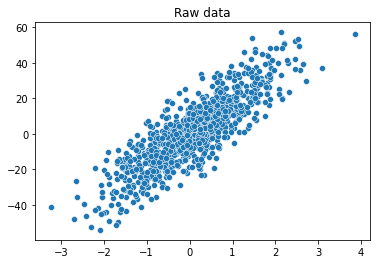

In [20]:
ax = sns.scatterplot(x=X_reg_uni.flatten(), y=y_reg_uni)
ax.set_title("Raw data")
plt.show()

Fit univariate model

In [22]:
lr_uni = LinearRegression()
lr_uni.learn(X_reg_uni, y_reg_uni)
y_hat = lr_uni.predict(X_reg_uni)

<AxesSubplot:>

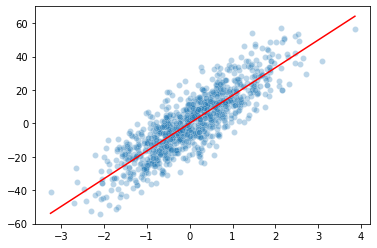

In [24]:
sns.scatterplot(x=X_reg_uni.flatten(), y=y_reg_uni, alpha=0.3)
sns.lineplot(x=X_reg_uni.flatten(), y=y_hat, color="red")